
# <center> CS  4783/5783
# <center> Fall 2022
# <center> Assignment 1 – Linear Regression 
# <center> Due: 09/16/2022 11:59 pm
# <center> Submitted By: Haridas Das

# Click Runtime --> Restart Runtime
#This will clear out all variables from memory and let me start over.

# Problem 1
Suppose that you are conducting a scientific experiment where you are observing the effects of one
variable (x_train.npy and x_test.npy) on the output (y_train.npy and y_test.npy). On visualizing the
relationship between the variables, you see the following plot:

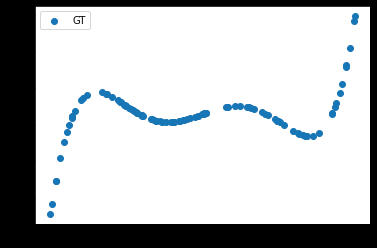

Your goal is to come up with a linear regression model that can take the training data (x_train.npy and
y_train.npy) and model the relationship between the variables x and y. You should implement your
own version of linear regression either using gradient descent or normal equations. **You SHOULD
NOT use any pre-packaged library such as Sci-Kit Learn.**

Here are somethings to keep in mind for tackling this problem:

1. Try to plot this relationship on your own using matplotlib. You can also visualize the test data
to see if it gives you any clues about the underlying relationship between the variables.

2. Use your knowledge gleaned from the previous step to answer the following questions:


a. Is the relationship linear?

b. Do you need feature engineering to add any non-linearity?

i. If so, how can you engineer these features?

ii. What are some functions that you can try?

1. Plot each of them individually to verify!

**You will need to write a short report detailing your thought process, the code you wrote in Python to
implement the linear regression model and the equation that models the relationship between x and y
that you found. You should provide evidence that corroborates your final statement such as plots,
prediction errors, etc.**

# Slution of Problem 1

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load the drive helper and mount 
from google.colab import drive 
# load mounting drive to access the files on the google MyDrive. 
# Basically it is it Mounted at /content/drive that can be reached to see the path on the "drive"
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# provide the link where my data is located
#path='/content/drive/MyDrive/Colab Notebooks/CS 5783 ML/Assignment1'

In [3]:
# load the train data
X_train=np.load('/content/drive/MyDrive/Colab Notebooks/CS 5783 ML/Assignment1/x_train.npy')
y_train=np.load('/content/drive/MyDrive/Colab Notebooks/CS 5783 ML/Assignment1/y_train.npy')
#print(X_train)

# Information about the Data frame

The data has 100 examples or observation for the training the model and to test the model we also have 100 examples in the data frame. Moreover, it has only one feature. 


# 1.1 
We build a linear regression model using normal equations using the x_train and y_rain data and find the model that shows the relationship between x and y. Here we plot the train and test data to find the relationship between x and y. 

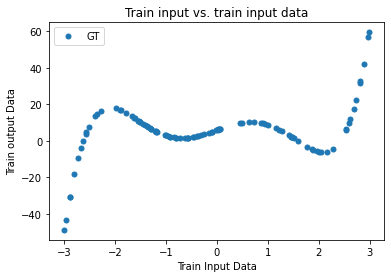

In [ ]:
# plot the relationship using the own using matplotlib.
plt.plot(X_train,y_train,'.', markersize=10, label='GT')
plt.xlabel("Train Input Data")
plt.ylabel("Train output Data")
plt.title("Train input vs. train input data")
plt.legend() # without the legend label='GT' wouln't work 
plt.show()

In [4]:
# look at the number of examples in the training data
print(X_train.shape)
print(y_train.shape)
print(y_train.ndim)
# Differences between dim, shape, rank, dimension and axis in numpy
# https://stackoverflow.com/questions/22114921/explaining-the-differences-between-dim-shape-rank-dimension-and-axis-in-numpy

(100, 1)
(100,)
1


In [5]:
# load the test data 
X_test=np.load('/content/drive/MyDrive/Colab Notebooks/CS 5783 ML/Assignment1/x_test.npy')
y_test=np.load('/content/drive/MyDrive/Colab Notebooks/CS 5783 ML/Assignment1/y_test.npy')
# look at the number of examples in the test data
print(X_test.shape)
print(y_test.shape)

(100, 1)
(100, 1)


# Plotted the test data

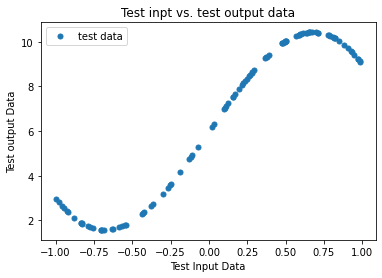

In [ ]:
plt.plot(X_test,y_test,'.',markersize='10', label='test data')
plt.xlabel("Test Input Data")
plt.ylabel("Test output Data")
plt.title("Test inpt vs. test output data")
plt.legend() # without the legend label='GT' wouln't work 
plt.show()

# 1.2 (a)
The last two figures show that the relationship between variables is definitely nonlinear. If they were linear, there would be a straight line in the graphs. The training graph looks like a W shape, and the test data looks like an S shape. 

# 1.2 (b)
Yes, we need it. Since both figures show the nonlinear relationship; therefore,  we need to add nonlinearity to fit the data. 

# 1.2.b (i)
We can add some basis functions to engineer these features. 
Therefore using the original feature x, we might add some linear or nonlinear basis function on it. 

# 1.2.b (ii)
We can add some basis functions to engineer these features. 
Therefore using the original feature x, we might add nonlinaer feature $x^i, i =2,3,4,5,..$ as it showes the nonlinearity. 

Goal: Find the Linear Regression Model
1. Linear Regression Model:
<center>  $h(x)=\sum_{i=0}^n \theta^T x$


2. Cost function or objective function

<center> $J(\theta)=\frac{1}{2} \sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})^2$

3. Find the set of parameters $\theta$ that will minimize the cost function $J(\theta)$ using the normal equation 

<center> $\theta = (X^TX)^{-1}X^Ty$, 

where $X$ is the input feature vector and $y$ is the expected target value.  

# Remark 
1. For the SLR, we should consider the cost function as $J(\theta)=\frac{1}{2} \sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})^2$ as you defined above. That means we need to consider \frac{1}{2} as a convenient term . 


2. For the average least square error in SLR, I should consider $J(\theta)/(no. of observations). 

# 1.2.b(1)

We now plot each of them by increasing polynomial functions.
Since the constant represents a point, liner represents a line, quadratic parabola, cubic S shape, Quartic W shape, and Quintic W-like shape. So we will try the combination of them as a polynomial to best fit our training and test data. We elaborate on the process step by step in the following. 

# Step 1: Linear or 1st order basis

Linear Regression with one feature vector X_train data

In [ ]:
len(X_train)

100

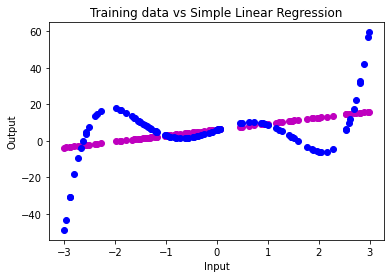

Error in the cost function or objective function 8466.736319868796
Mean Error in the cost function or objective function 84.66736319868797


In [6]:
# we want to create a matrix whose first column represnts theta_0 and second column represnts theta_1 as we have single feature.
# we will use a the reshape command:  numpy.reshape(a, newshape, order='C') to create a dummy column then append it to the X_train data.
dummy_theta0_vec=np.ones((len(X_train),1)) # 100 values as vector 
#print(X_train)
#x_train=np.reshape(X_train,(100,1))
X_L1_system=np.append(dummy_theta0_vec,X_train,axis=1) # axis=1 is required otherwise the data frame doesn't look good
#print(X_L1_system)
# update the training data
x_train=X_L1_system 
# Using the normal equation we find the set of parameters  θ  that will minimize the cost function  J(θ)
theta_vec=np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train) 
#print(theta_vec)
# Using the matrix multiplication: np.matmul we will calculate the y_predict 
y_predict=np.matmul(x_train,theta_vec)
plt.plot(X_train,y_predict,'mo') # plot X_train and y_predict using Magenta circle markers
plt.plot(X_train,y_train, 'bo') # plot X_train and y_train using blue circle markers
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Training data vs Simple Linear Regression')
plt.show()
obj_fun_error=np.sum(np.square(y_predict-y_train))/2
print('Error in the cost function or objective function',obj_fun_error)
mean_objfun_error=np.sum(np.square(y_predict-y_train))/(2*100)
print('Mean Error in the cost function or objective function',mean_objfun_error)

# Step 2: Combination of 1st and 2nd order basis

Linear Regression with two feature vector X_train and X_train^2 *data*

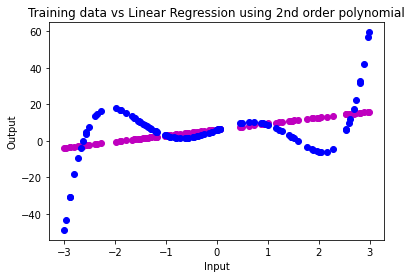

Error in the cost function or objective function 8466.565897192175
Mean Error in the cost function or objective function 84.66565897192174


In [7]:
# we want to create a matrix whose first column represnts theta_0 and second column represnts theta_1 as we have single feature.
# we will use a the reshape command:  numpy.reshape(a, newshape, order='C') to create a dummy column then append it to the X_train data.
dummy_theta0_vec=np.ones((100,1)) # 100 values as vector 
#print(X_train)
X_train_sq=np.square(np.reshape(X_train,(100,1)))
X_L2_system=np.append(X_L1_system,X_train_sq,axis=1) # axis=1 is required 
#print(X_L2_system)
# update the training data
x_train=X_L2_system 
# Using the normal equation we find the set of parameters  θ  that will minimize the cost function  J(θ)
theta_vec=np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train) 
#print(theta_vec)
# Using the matrix multiplication: np.matmul we will calculate the y_predict 
y_predict=np.matmul(x_train,theta_vec)
#print(y_predict)
plt.plot(X_train,y_predict,'mo') # plot X_train and y_predict using Magenta circle markers
plt.plot(X_train,y_train, 'bo') # plot X_train and y_train using blue circle markers
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Training data vs Linear Regression using 2nd order polynomial')
plt.show()
obj_fun_error=np.sum(np.square(y_predict-y_train))/2
print('Error in the cost function or objective function',obj_fun_error)
mean_objfun_error=np.sum(np.square(y_predict-y_train))/(2*100)
print('Mean Error in the cost function or objective function',mean_objfun_error)

# Step 3: Combination of 1st, 2nd, 3rd order basis

Linear Regression with three feature vector X_train, X_train^2 and X_train^3 data

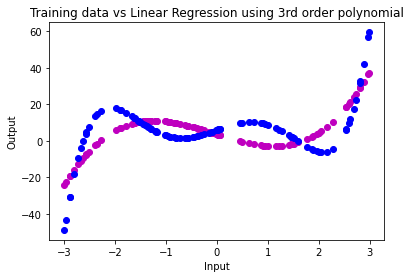

Error in the cost function or objective function 4053.887072882679
Mean Error in the cost function or objective function 40.538870728826794


In [8]:
# we want to create a matrix whose first column represnts theta_0 and second column represnts theta_1 as we have single feature.
# we will use a the reshape command:  numpy.reshape(a, newshape, order='C') to create a dummy column then append it to the X_train data.
#Gives a new shape to an array without changing its data.
X_train_cube=(X_train**3).reshape(100,1)
X_L3_system=np.append(X_L2_system,X_train_cube,axis=1) # axis=1 is required 
#print(X_L3_system)
# update the training data
x_train=X_L3_system 
# Using the normal equation we find the set of parameters  θ  that will minimize the cost function  J(θ)
theta_vec=np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train) 
#print(theta_vec)
# Using the matrix multiplication: np.matmul we will calculate the y_predict 
y_predict=np.matmul(x_train,theta_vec)
#print(y_predict)
plt.plot(X_train,y_predict,'mo') # plot X_train and y_predict using Magenta circle markers
plt.plot(X_train,y_train, 'bo') # plot X_train and y_train using blue circle markers
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Training data vs Linear Regression using 3rd order polynomial')
plt.show()
obj_fun_error=np.sum(np.square(y_predict-y_train))/2
print('Error in the cost function or objective function',obj_fun_error)
mean_objfun_error=np.sum(np.square(y_predict-y_train))/(2*100)
print('Mean Error in the cost function or objective function',mean_objfun_error)

# Step 4: Combination of 1st, 2nd, 3rd and 4th order basis

Linear Regression with three feature vector X_train, X_train^2, X_train^3, and X_train^4

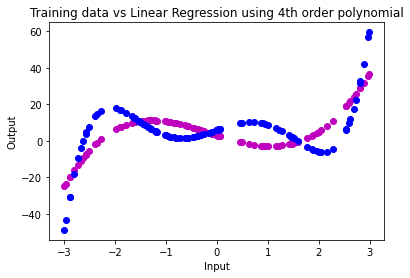

Error in the cost function or objective function 4045.1772993562913
Mean Error in the cost function or objective function 40.45177299356291


In [9]:
# we want to create a matrix whose first column represnts theta_0 and second column represnts theta_1 as we have single feature.
# we will use a the reshape command:  numpy.reshape(a, newshape, order='C') to create a dummy column then append it to the X_train data.
X_train_forth=(X_train**4).reshape(100,1)
X_L4_system=np.append(X_L3_system,X_train_forth,axis=1) # axis=1 is required 
#print(X_L4_system)
# update the training data
x_train=X_L4_system 
# Using the normal equation we find the set of parameters  θ  that will minimize the cost function  J(θ)
theta_vec=np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train) 
#print(theta_vec)
# Using the matrix multiplication: np.matmul we will calculate the y_predict 
y_predict=np.matmul(x_train,theta_vec)
#print(y_predict)
plt.plot(X_train,y_predict,'mo') # plot X_train and y_predict using Magenta circle markers
plt.plot(X_train,y_train, 'bo') # plot X_train and y_train using blue circle markers
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Training data vs Linear Regression using 4th order polynomial')
plt.show()
obj_fun_error=np.sum(np.square(y_predict-y_train))/2
print('Error in the cost function or objective function',obj_fun_error)
mean_objfun_error=np.sum(np.square(y_predict-y_train))/(2*100)
print('Mean Error in the cost function or objective function',mean_objfun_error)

# Step 5: Combination of 1st, 2nd, 3rd, 4th and 5th order basis

Linear Regression with three feature vector X_train, X_train^2, X_train^3, X_train^4, and X_train^5

[ 6.00000000e+00  1.00000000e+01 -7.77156117e-15 -8.00000000e+00
  6.66133815e-16  1.00000000e+00]


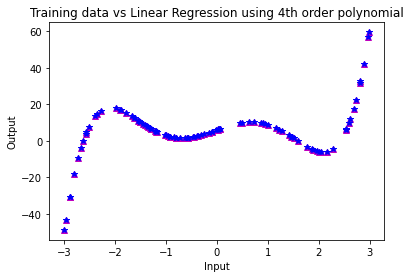

Error in the cost function or objective function 1.3738994303212855e-24
Mean Error in the cost function or objective function 1.3738994303212854e-26


In [10]:
# we want to create a matrix whose first column represnts theta_0 and second column represnts theta_1 as we have single feature.
# we will use a the reshape command:  numpy.reshape(a, newshape, order='C') to create a dummy column then append it to the X_train data.
X_train_fifth=(X_train**5).reshape(100,1)
X_L5_system=np.append(X_L4_system,X_train_fifth,axis=1) # axis=1 is required 
#print(X_L5_system)
# update the training data
x_train=X_L5_system 
# Using the normal equation we find the set of parameters  θ  that will minimize the cost function  J(θ)
theta_vec=np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train) 
print(theta_vec)
# Using the matrix multiplication: np.matmul we will calculate the y_predict 
y_predict=np.matmul(x_train,theta_vec)
#print(y_predict)
plt.plot(X_train,y_predict,'m^',label='predicted',linewidth=10.0) # plot X_train and y_predict using Magenta circle markers
plt.plot(X_train,y_train, 'b*',label='train') # plot X_train and y_train using blue circle markers
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Training data vs Linear Regression using 4th order polynomial')
plt.show()
obj_fun_error=np.sum(np.square(y_predict-y_train))/2
print('Error in the cost function or objective function',obj_fun_error)
mean_objfun_error=np.sum(np.square(y_predict-y_train))/(2*100)
print('Mean Error in the cost function or objective function',mean_objfun_error)

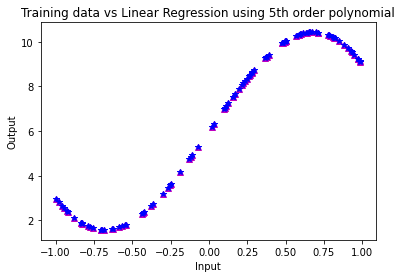

Error in the cost function or objective function 1.6186133029326731e-24
Mean Error in the cost function or objective function 1.6186133029326733e-26


In [11]:
# we want to create a matrix whose first column represnts theta_0 and second column represnts theta_1 as we have single feature.
# we will use a the reshape command:  numpy.reshape(a, newshape, order='C') to create a dummy column then append it to the X_train data.
X_test_fifth=(X_test**5).reshape(len(X_test),1)
dummy_theta0_vec=np.ones((len(X_test),1)) # 100 values as vector 
#print(X_train)
#x_train=np.reshape(X_train,(100,1))
X_main0_system=np.c_[dummy_theta0_vec,X_test,X_test**2,X_test**3,X_test**4] # axis=1 is required 

X_main_system=np.append(X_main0_system,X_test_fifth,axis=1) # axis=1 is required 
x_test=X_main_system # Test Data is defined by the new variable named x_test into a matrix form A
# Using the matrix multiplication: np.matmul we will calculate the y_predict by y=A*theta_vec
y_predict=np.matmul(x_test,theta_vec).reshape(len(X_test),1)
#print(y_predict)
fig = plt.figure()

plt.plot(X_test,y_predict,'m^',label='predicted',linewidth=10.0) # plot X_test and y_predict using Magenta ^ markers
plt.plot(X_test,y_test, 'b*',label='test') # plot X_test and y_test using blue c* markers
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Training data vs Linear Regression using 5th order polynomial')
plt.legend
plt.show()
obj_fun_error=np.sum(np.square(y_predict-y_test))/2
print('Error in the cost function or objective function',obj_fun_error)
mean_objfun_error=np.sum(np.square(y_predict-y_test))/(2*100)
print('Mean Error in the cost function or objective function',mean_objfun_error)

# plot helps: https://stackoverflow.com/questions/42758897/change-line-width-of-lines-in-matplotlib-pyplot-legend

# Problem 1 Conclusion Analysis: 

We now use these theta values to see test input data. The plot shows that the fifth-order basis function perfectly fits the data. We can try some other $sin, cosine, e^x $ e.t.c. function as well if it doesn't fit well. Since the curve has a nice nonlinearity, the combination of the basis $x^i, i=1,2,3,4,5$ gives us the best fit.  

# Problem 2
Imagine that you are a realtor in Stillwater. You have data points that correspond to the recent sales
of different houses in and around Stillwater. Your goal is to help estimate the prices of houses that
one can use to sell or buy listings. Can you use your knowledge of linear regression to find the best
regression model? Use your implementation from Question 1 (without any basis functions) to answer
the following questions.


1. What is the average least squares error for the given data using your simple linear regression
model?

2. Which factor has the most effect on the final value? How do you know this? Can you use only this feature to predict the price?

3. Which factor has the least effect on the final value? How do you know this? What effect does removing this feature have on the performance?

# Solution of Problem 2:

In [147]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [148]:
# upload the data and read the Data 
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS 5783 ML/Assignment1/Assignment1_Q2_Data.csv',)
df.shape #  Data frame has 28 rows and 13 columns.
print(df.shape)
df.head(10)

(28, 13)


,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,Architecture type,# Fire places,Price (1000$)
0,1,4.9176,1.0,3.472,0.998,1.0,7,4,42,3,1,0,25.9
1,2,5.0208,1.0,3.531,1.500,2.0,7,4,62,1,1,0,29.5
2,3,4.5429,1.0,2.275,1.175,1.0,6,3,40,2,1,0,27.9
3,4,4.5573,1.0,4.050,1.232,1.0,6,3,54,4,1,0,25.9
4,5,5.0597,1.0,4.455,1.121,1.0,6,3,42,3,1,0,29.9
5,6,3.8910,1.0,4.455,0.988,1.0,6,3,56,2,1,0,29.9
6,7,5.8980,1.0,5.850,1.240,1.0,7,3,51,2,1,1,30.9
7,8,5.6039,1.0,9.520,1.501,0.0,6,3,32,1,1,0,28.9
8,9,16.4202,2.5,9.800,3.420,2.0,10,5,42,2,1,1,84.9
9,10,14.4598,2.5,12.800,3.000,2.0,9,5,14,4,1,1,82.9


# Data frame information
The data has 28 examples or observation for the training the model and 13 features. To test the model or data validation we use the variable "percentage" variable that will choose the training and the test data automatically. Similar to above, we build a Simple linear regression model and use normal equation to find the parameters. 

# Modeling
We now have eleven important features to model, except the House Id as it is not considered an important feature. Therefore, we will model one by one using those features and find the most effective and less effective features from the data frame to see the recent sales of different houses in and around Stillwater. 


# Possible important models

1.	Model 0: Price ~ Local Price + Bathrooms + Land Area + Living area + # Garages + # Rooms + # Bedrooms + Age of Home + Construction type + Architecture type+ # Fire places

2.	Model 1: Price ~ Local Price
3.	Model 2: Price ~ Bathrooms 
4.	Model 3: Price ~ Land Area 
5.	Model 4: Price ~ Living area 
6.	Model 5: Price ~ # Garages 
7.	Model 6: Price ~ # Rooms 
8.	Model 7: Price ~ # Bedrooms 
9.	Model 8: Price ~ Age of Home 
10.	Model 9: Price ~  Construction type 
11.	Model 10: Price ~  Architecture type
12	Model 11: Price ~  # Fire places


# Define the **Training data** and *Model validation* from Data frame using the variable I defined **'percentage'** for the coding. 



# Model 0: 

Price ~ Local Price + Bathrooms + Land Area + Living area + # Garages + # Rooms + # Bedrooms + Age of Home + Construction type + Architecture type+ # Fire places+ noise term;

where $̂\hat{\theta_i}, i=0,11$ are coefficients, noise term is iid. 
# Model 0:  
Model 0: Price=(θ_0 ) ̂+ (θ_1 ) ̂Local Price +(θ_2 ) ̂  Bathrooms +(θ_3 ) ̂  Land Area + (θ_4 ) ̂Living area +(θ_5 ) ̂  # Garages +(θ_6 ) ̂  ( # Rooms) + (θ_7 ) ̂(# Bedrooms) + (θ_8 ) ̂Age of Home +(θ_9 ) ̂  Construction type +(θ_10 ) ̂  Architecture type+(θ_11 ) ̂ ( # Fire places)

where $̂\hat{\theta_i}, i=0,11$ are coefficients from following.  


# Predictive Model-0 Parameters when we consider **total data set as the trainingg set, i.e. percentage=1= 100%**
 
Where , (θ_0 ) ̂=2.54245911; (θ_1 ) ̂=0.84203461; (θ_2 ) ̂=9.13727309 ;(θ_3 ) ̂=0.1805502; + (θ_4 ) ̂=13.31511517; (θ_5 ) ̂=1.93053047; (θ_6 ) ̂=-1.07030169 ; (θ_7 ) ̂=-0.30201195; (θ_8 ) ̂=-0.07198748; (θ_9 ) ̂=1.02264378; (θ_10 ) ̂=1.33991086,and (θ_11 ) ̂=2.78686263

22
Following are the theta parameters or weights of the linear regression model for the data frame of percentage 80.0
[-0.35659236  2.26588613 14.54961061  0.67862191  2.14754904  2.33929783
 -4.98818968  5.63359913  0.07220799 -0.2766333   4.23587689  6.31420526]


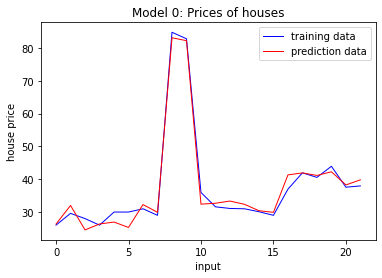

Average least squares error for the simple linear regression on training data 2.3530518421310846 on the training data frame percentage 80.0


In [17]:
from numpy.lib.function_base import disp
percentage= .80 # this will be working in rest of this problem 
# define the training data 
# first define how many examples we want 65 % data in the training set  
no_train=int(np.round(len(df)*percentage)) # round the number and then take into integer by the int command. np.int is the bad command
print(no_train)

# train the input data
# DataFrame.iloc Purely integer-location based indexing for selection by position.
X_train=df.iloc[0:no_train,1:df.shape[1]-1] # remove House ID from the df and target vealue "price" from the training data frame
df_theta0_vec=np.ones((len(X_train),1))
x_train=np.append(df_theta0_vec,X_train,axis=1)
#print(x_train.shape)
# train the output data
y_train=df.iloc[0:no_train,df.shape[1]-1].values
#print(y_train.shape)
#print(x_train)
#print(y_train)
# theta parameters or weights of the linear regression model are computed using the normal form 
theta_vec=np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
print('Following are the theta parameters or weights of the linear regression model for the data frame of percentage',percentage*100)
print(theta_vec)
model_parameters=theta_vec
y_predict=np.matmul(x_train,theta_vec)
#print(y_predict)

# plot the data 
df_serial=np.arange(0,len(X_train),1)

plt.plot(df_serial,y_train,'b-',linewidth=1,label='training data')
plt.plot(df_serial,y_predict,'r-',linewidth=1,label='prediction data')
plt.xlabel('input')
plt.ylabel('house price')
plt.title('Model 0: Prices of houses')
plt.legend()
plt.show()
# problem 2 (1)
mse=np.sum(np.square(y_predict-y_train))/(2*len(X_train))
print('Average least squares error for the simple linear regression on training data',mse, 'on the training data frame percentage', percentage*100)

# Model 0: 
Price=(θ_0 ) ̂+ (θ_1 ) ̂Local Price +(θ_2 ) ̂  Bathrooms +(θ_3 ) ̂  Land Area + (θ_4 ) ̂Living area +(θ_5 ) ̂  # Garages +(θ_6 ) ̂  ( # Rooms) + (θ_7 ) ̂(# Bedrooms) + (θ_8 ) ̂Age of Home +(θ_9 ) ̂  Construction type +(θ_10 ) ̂  Architecture type+(θ_11 ) ̂ ( # Fire places) +noise, 

where $̂\hat{\theta_i}, i=0,11$ are coefficients, noise is iid. 


# Model 0:
Price=(θ_0 ) ̂+ (θ_1 ) ̂Local Price +(θ_2 ) ̂  Bathrooms +(θ_3 ) ̂  Land Area + (θ_4 ) ̂Living area +(θ_5 ) ̂  # Garages +(θ_6 ) ̂  ( # Rooms) + (θ_7 ) ̂(# Bedrooms) + (θ_8 ) ̂Age of Home +(θ_9 ) ̂  Construction type +(θ_10 ) ̂  Architecture type+(θ_11 ) ̂ ( # Fire places)

where $̂\hat{\theta_i}, i=0,11$ are coefficients from the above output.   

# Define the Test Data and Run the Test Data using the parameters of the model above  

(6, 12)


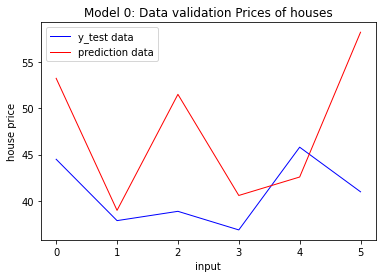

Average least squares error for the simple linear regression on test data 46.17503052581946 on the test data frame percentage 19.999999999999996


In [18]:
# Define the test Data
X_test=df.iloc[no_train:df.shape[0],1:df.shape[1]-1]
y_test=df.iloc[no_train:df.shape[0],df.shape[1]-1].values  # .values only consider the values not the position and values both
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

# construct system for the test data 
df_theta0_vec=np.ones((len(X_test),1))
x_test=np.append(df_theta0_vec,X_test,axis=1)
print(x_test.shape)
# Prediction is computed in the below 
y_predict=np.matmul(x_test,theta_vec)
#print(y_predict)
# plot the data 
df_serial=np.arange(0,len(X_test),1)
plt.plot(df_serial,y_test,'b-',linewidth=1,label='y_test data')
plt.plot(df_serial,y_predict,'r-',linewidth=1,label='prediction data')
plt.xlabel('input')
plt.ylabel('house price')
plt.title('Model 0: Data validation Prices of houses')
plt.legend()
plt.show()
mse=np.sum(np.square(y_predict-y_test))/(2*len(X_test))
print('Average least squares error for the simple linear regression on test data',mse, 'on the test data frame percentage', (1-percentage)*100)

# Guess

We now find the most effective feature in the final value. As we are looking at the price of the houses, let's find the maximum value from the model parameters that came out from model 0 because it has a greater chance of impacting house sales. Perhaps, we will conclude it at the end by comparing all the models as the models are considered "price VS. all individual predictors" that could tell us the most compelling feature. 

In [19]:
# problem 2 (2) First, we will see how find the maximum wight value from the model predictors
disp('Following are the theta parameters or weights of the linear regression model')
print(theta_vec)
print(model_parameters)
maximum = model_parameters[0]
index = 0
for i in range(len(model_parameters)):
  if model_parameters[i] > maximum:
    maximum = model_parameters[i]
    index= i
print('Maximum model_parameter is', maximum,'at index',index) 

Following are the theta parameters or weights of the linear regression model
[-0.35659236  2.26588613 14.54961061  0.67862191  2.14754904  2.33929783
 -4.98818968  5.63359913  0.07220799 -0.2766333   4.23587689  6.31420526]
[-0.35659236  2.26588613 14.54961061  0.67862191  2.14754904  2.33929783
 -4.98818968  5.63359913  0.07220799 -0.2766333   4.23587689  6.31420526]
Maximum model_parameter is 14.549610614032488 at index 2


# Model 2: Price ~ Bathrooms 

This implies that No. of Bathrooms gives us the Simple linear regression model with higher weights. Perhaps, we want to check independently how much it is related to the house price. 

# Define the train Data using the unique feature no. of Bathrooms

22
Following are the theta parameters or weights of the linear regression model
[-2.8375     32.80833333]


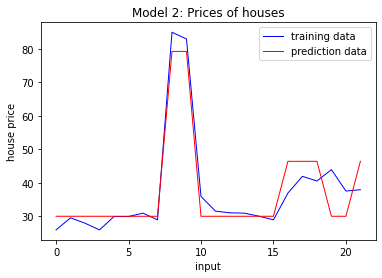

Average least squares error for the simple linear regression on training data 13.490530303030305 on the training data frame percentage 80.0


In [20]:
# define the training data 
# first define how many examples we want 65 % data in the training set  
no_train=int(np.round(len(df)*percentage)) # round the number and then take into integer by the int command. np.int is the bad command
print(no_train)
# train the input data
# DataFrame.iloc Purely integer-location based indexing for selection by position.
X_train=df.iloc[0:no_train,index].values # take only Bathrooms whose index=2
x_train=np.c_[np.ones((no_train,1)),X_train]
#print(x_train.shape)
# train the output data
y_train=df.iloc[0:no_train,df.shape[1]-1].values
#print(y_train.shape)
#print(x_train)
#print(y_train)
# theta parameters or weights of the linear regression model are computed using the normal form 
theta_vec=np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
disp('Following are the theta parameters or weights of the linear regression model')
print(theta_vec)
y_predict=np.matmul(x_train,theta_vec)
#print(y_predict)

# plot the data 
df_serial=np.arange(0,len(X_train),1)
plt.plot(df_serial,y_train,'b-',linewidth=1,label='training data')
plt.plot(df_serial,y_predict,'r-',linewidth=1,label='prediction data')
plt.xlabel('input')
plt.ylabel('house price')
plt.title('Model 2: Prices of houses')
plt.legend()
plt.show()
# problem 2 (1)
mse=np.sum(np.square(y_predict-y_train))/(2*len(X_train))
print('Average least squares error for the simple linear regression on training data',mse, 'on the training data frame percentage', percentage*100)

# Define the test Data using the unique feature no. of Bathrooms

# Model 2:
Price=(θ_0 ) ̂+ (θ_1 ) ̂Local Price +(θ_2 ) ̂  Bathrooms +(θ_3 ) ̂  Land Area + (θ_4 ) ̂Living area +(θ_5 ) ̂  # Garages +(θ_6 ) ̂  ( # Rooms) + (θ_7 ) ̂(# Bedrooms) + (θ_8 ) ̂Age of Home +(θ_9 ) ̂  Construction type +(θ_10 ) ̂  Architecture type+(θ_11 ) ̂ ( # Fire places)

where all $̂\hat{\theta_i}, i=0,11$ are zero except $i=0,2$ that come from the above table.   

(6, 2)


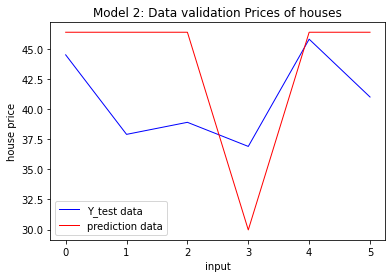

Average least squares error for the simple linear regression on test data 17.370956307870426 on the test data frame percentage 19.999999999999996


In [22]:
# Define the test Data
X_test=df.iloc[no_train:df.shape[0],index]
y_test=df.iloc[no_train:df.shape[0],df.shape[1]-1].values  # .values only consider the values not the position and values both
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

# construct system for the test data 
x_test=np.c_[np.ones((df.shape[0]-no_train,1)),X_test]
print(x_test.shape)
# Prediction is computed in the below 
y_predict=np.matmul(x_test,theta_vec)
#print(y_predict)

# plot the data 
df_serial=np.arange(0,len(X_test),1)
plt.plot(df_serial,y_test,'b-',linewidth=1,label='Y_test data')
plt.plot(df_serial,y_predict,'r-',linewidth=1,label='prediction data')
plt.xlabel('input')
plt.ylabel('house price')
plt.title('Model 2: Data validation Prices of houses')
plt.legend()
plt.show()
# problem 2 (1)
mse=np.sum(np.square(y_predict-y_test))/(2*len(X_test))
print('Average least squares error for the simple linear regression on test data',mse,'on the test data frame percentage', (1-percentage)*100)

# Guess 

We now find the least effective feature in the final value. As we are looking at the price of the houses, let's find the minimum value from the model parameters that came out from model 6 because it has a lower chance of impacting house sales. Then, perhaps, we will conclude it at the end by comparing all the models as the models are considered "price VS. all individual predictors" that could tell us the most compelling feature.

In [23]:
# problem 2 (3) First, we will see how find the maximum wight value from the model predictors
disp('Following are the theta parameters or weights of the linear regression model')
print(theta_vec)
print(model_parameters)
minimum = model_parameters[0]
index = 0
for i in range(len(model_parameters)):
  if model_parameters[i] < minimum:
    minimum = model_parameters[i]
    index= i
print('Minimum model_parameter is', minimum,'at index',index) 

Following are the theta parameters or weights of the linear regression model
[-2.8375     32.80833333]
[-0.35659236  2.26588613 14.54961061  0.67862191  2.14754904  2.33929783
 -4.98818968  5.63359913  0.07220799 -0.2766333   4.23587689  6.31420526]
Minimum model_parameter is -4.9881896826431955 at index 6


# This implies that number of rooms gives us the linear model's lower weights. Perhaps, we want to check independently how much it is related to the house price. But may be No. 

# Model 6: Price ~ # Rooms 



 

22
Following are the theta parameters or weights of the linear regression model
[-34.58888889  11.00246914]


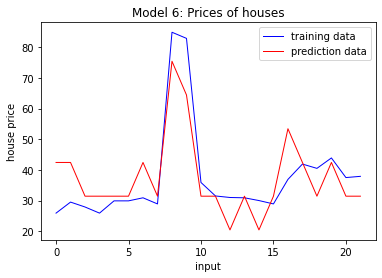

Average least squares error for the simple linear regression on training data 39.203260381593736 on the training data frame percentage 80.0


In [25]:
# define the training data 
# first define how many examples we want 65 % data in the training set  
no_train=int(np.round(len(df)*percentage)) # round the number and then take into integer by the int command. np.int is the bad command
print(no_train)

# train the input data
# DataFrame.iloc Purely integer-location based indexing for selection by position.
X_train=df.iloc[0:no_train,index].values # take only Bathrooms
x_train=np.c_[np.ones((no_train,1)),X_train]
#print(x_train.shape)
# train the output data
y_train=df.iloc[0:no_train,df.shape[1]-1].values
#print(y_train.shape)
#print(x_train)
#print(y_train)
# theta parameters or weights of the linear regression model are computed using the normal form 
theta_vec=np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
disp('Following are the theta parameters or weights of the linear regression model')
print(theta_vec)
y_predict=np.matmul(x_train,theta_vec)
#print(y_predict)
# plot the data 
df_serial=np.arange(0,len(X_train),1)
plt.plot(df_serial,y_train,'b-',linewidth=1,label='training data')
plt.plot(df_serial,y_predict,'r-',linewidth=1,label='prediction data')
plt.xlabel('input')
plt.ylabel('house price')
plt.title('Model 6: Prices of houses')
plt.legend()
plt.show()
# problem 2 (1)
mse=np.sum(np.square(y_predict-y_train))/(2*len(X_train))
print('Average least squares error for the simple linear regression on training data',mse, 'on the training data frame percentage', percentage*100)

# Model 6:
Price=(θ_0 ) ̂+ (θ_1 ) ̂Local Price +(θ_2 ) ̂  Bathrooms +(θ_3 ) ̂  Land Area + (θ_4 ) ̂Living area +(θ_5 ) ̂  # Garages +(θ_6 ) ̂  ( # Rooms) + (θ_7 ) ̂(# Bedrooms) + (θ_8 ) ̂Age of Home +(θ_9 ) ̂  Construction type +(θ_10 ) ̂  Architecture type+(θ_11 ) ̂ ( # Fire places)

where all $̂\hat{\theta_i}, i=0,11$ are zero except $i=0,6$ that come from the above table.   

(6, 2)


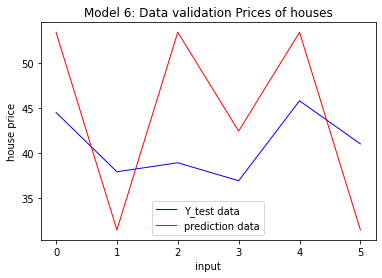

Average least squares error for the simple linear regression on test data 42.773009957831846 on the test data frame percentage 19.999999999999996


In [26]:
# Define the test Data
X_test=df.iloc[no_train:df.shape[0],index]
y_test=df.iloc[no_train:df.shape[0],df.shape[1]-1].values  # .values only consider the values not the position and values both
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

# construct system for the test data 
x_test=np.c_[np.ones((df.shape[0]-no_train,1)),X_test]
print(x_test.shape)
# Prediction is computed in the below 
y_predict=np.matmul(x_test,theta_vec)
#print(y_predict)

# plot the data 
df_serial=np.arange(0,len(X_test),1)
plt.plot(df_serial,y_test,'b-',linewidth=1,label='Y_test data')
plt.plot(df_serial,y_predict,'r-',linewidth=1,label='prediction data')
plt.xlabel('input')
plt.ylabel('house price')
plt.title('Model 6: Data validation Prices of houses')
plt.legend()
plt.show()
# problem 2 (1)
mse=np.sum(np.square(y_predict-y_test))/(2*len(X_test))
print('Average least squares error for the simple linear regression on test data',mse,'on the test data frame percentage', (1-percentage)*100)

# Model 1: Price ~ Local Price

22
Following are the theta parameters or weights of the linear regression model
[3.42471132 4.99765736]


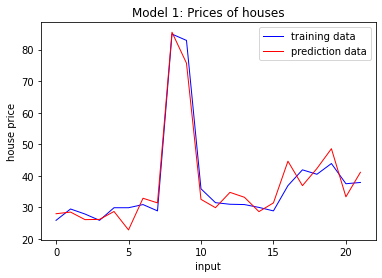

Average least squares error for the simple linear regression on training data 6.850726514502525 on the training data frame percentage 80.0


In [28]:
# define the training data 
index=1 # as predictor variable is Local Price

no_train=int(np.round(len(df)*percentage)) # round the number and then take into integer by the int command. np.int is the bad command
print(no_train)
# train the input data
# DataFrame.iloc Purely integer-location based indexing for selection by position.
X_train=df.iloc[0:no_train,index].values # take only Bathrooms
x_train=np.c_[np.ones((no_train,1)),X_train]
#print(x_train.shape)
# train the output data
y_train=df.iloc[0:no_train,df.shape[1]-1].values
#print(y_train.shape)
#print(x_train)
#print(y_train)
# theta parameters or weights of the linear regression model are computed using the normal form 
theta_vec=np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
disp('Following are the theta parameters or weights of the linear regression model')
print(theta_vec)
y_predict=np.matmul(x_train,theta_vec)
#print(y_predict)
# plot the data 
df_serial=np.arange(0,len(X_train),1)
plt.plot(df_serial,y_train,'b-',linewidth=1,label='training data')
plt.plot(df_serial,y_predict,'r-',linewidth=1,label='prediction data')
plt.xlabel('input')
plt.ylabel('house price')
plt.title('Model 1: Prices of houses')
plt.legend()
plt.show()
# problem 2 (1)
mse=np.sum(np.square(y_predict-y_train))/(2*len(X_train))
print('Average least squares error for the simple linear regression on training data',mse, 'on the training data frame percentage', percentage*100)

# Model 1:
Price=(θ_0 ) ̂+ (θ_1 ) ̂Local Price +(θ_2 ) ̂  Bathrooms +(θ_3 ) ̂  Land Area + (θ_4 ) ̂Living area +(θ_5 ) ̂  # Garages +(θ_6 ) ̂  ( # Rooms) + (θ_7 ) ̂(# Bedrooms) + (θ_8 ) ̂Age of Home +(θ_9 ) ̂  Construction type +(θ_10 ) ̂  Architecture type+(θ_11 ) ̂ ( # Fire places)

where all $̂\hat{\theta_i}, i=0,11$ are zero except $i=0,1$ that come from the above table.   

(6, 2)


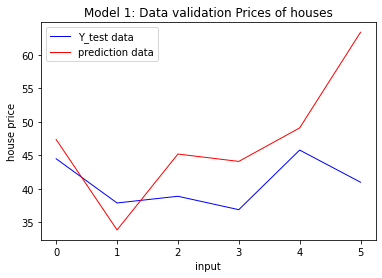

Average least squares error for the simple linear regression on test data 52.39813421249863 on the test data frame percentage 19.999999999999996


In [29]:
# Define the test Data
X_test=df.iloc[no_train:df.shape[0],index]
y_test=df.iloc[no_train:df.shape[0],df.shape[1]-1].values  # .values only consider the values not the position and values both
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

# construct system for the test data 
x_test=np.c_[np.ones((df.shape[0]-no_train,1)),X_test]
print(x_test.shape)
# Prediction is computed in the below 
y_predict=np.matmul(x_test,theta_vec)
#print(y_predict)

# plot the data 
df_serial=np.arange(0,len(X_test),1)
plt.plot(df_serial,y_test,'b-',linewidth=1,label='Y_test data')
plt.plot(df_serial,y_predict,'r-',linewidth=1,label='prediction data')
plt.xlabel('input')
plt.ylabel('house price')
plt.title('Model 1: Data validation Prices of houses')
plt.legend()
plt.show()
# problem 2 (1)
mse=np.sum(np.square(y_predict-y_test))/(2*len(X_test))
print('Average least squares error for the simple linear regression on test data',mse,'on the test data frame percentage', (1-percentage)*100)

# Model 3: Price ~ Land Area 

22
Following are the theta parameters or weights of the linear regression model
[10.25408117  4.43442215]


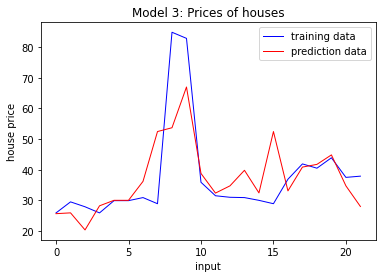

Average least squares error for the simple linear regression on training data 60.724174324953175 on the training data frame percentage 80.0


In [30]:
# define the training data and code 
index=3 # as predictor variable changed
no_train=int(np.round(len(df)*percentage)) # round the number and then take into integer by the int command. np.int is the bad command
print(no_train)
# train the input data
# DataFrame.iloc Purely integer-location based indexing for selection by position.
X_train=df.iloc[0:no_train,index].values # take only Bathrooms
x_train=np.c_[np.ones((no_train,1)),X_train]
#print(x_train.shape)
# train the output data
y_train=df.iloc[0:no_train,df.shape[1]-1].values
#print(y_train.shape)
#print(x_train)
#print(y_train)
# theta parameters or weights of the linear regression model are computed using the normal form 
theta_vec=np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
disp('Following are the theta parameters or weights of the linear regression model')
print(theta_vec)
y_predict=np.matmul(x_train,theta_vec)
#print(y_predict)
# plot the data 
df_serial=np.arange(0,len(X_train),1)
plt.plot(df_serial,y_train,'b-',linewidth=1,label='training data')
plt.plot(df_serial,y_predict,'r-',linewidth=1,label='prediction data')
plt.xlabel('input')
plt.ylabel('house price')
plt.title('Model 3: Prices of houses')
plt.legend()
plt.show()
# problem 2 (1)
mse=np.sum(np.square(y_predict-y_train))/(2*len(X_train))
print('Average least squares error for the simple linear regression on training data',mse, 'on the training data frame percentage', percentage*100)

# Model 3:
Price=(θ_0 ) ̂+ (θ_1 ) ̂Local Price +(θ_2 ) ̂  Bathrooms +(θ_3 ) ̂  Land Area + (θ_4 ) ̂Living area +(θ_5 ) ̂  # Garages +(θ_6 ) ̂  ( # Rooms) + (θ_7 ) ̂(# Bedrooms) + (θ_8 ) ̂Age of Home +(θ_9 ) ̂  Construction type +(θ_10 ) ̂  Architecture type+(θ_11 ) ̂ ( # Fire places)

where all $̂\hat{\theta_i}, i=0,11$ are zero except $i=0,3$ that come from the above table.   

(6, 2)


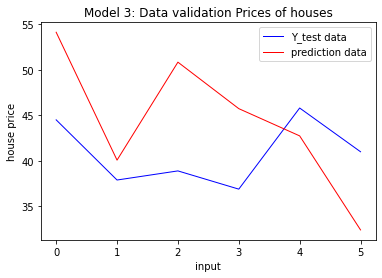

Average least squares error for the simple linear regression on test data 33.35415566906369 on the test data frame percentage 19.999999999999996


In [31]:
# Define the test Data Validation 
X_test=df.iloc[no_train:df.shape[0],index]
y_test=df.iloc[no_train:df.shape[0],df.shape[1]-1].values  # .values only consider the values not the position and values both
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

# construct system for the test data 
x_test=np.c_[np.ones((df.shape[0]-no_train,1)),X_test]
print(x_test.shape)
# Prediction is computed in the below 
y_predict=np.matmul(x_test,theta_vec)
#print(y_predict)

# plot the data 
df_serial=np.arange(0,len(X_test),1)
plt.plot(df_serial,y_test,'b-',linewidth=1,label='Y_test data')
plt.plot(df_serial,y_predict,'r-',linewidth=1,label='prediction data')
plt.xlabel('input')
plt.ylabel('house price')
plt.title('Model 3: Data validation Prices of houses')
plt.legend()
plt.show()
# problem 2 (1)
mse=np.sum(np.square(y_predict-y_test))/(2*len(X_test))
print('Average least squares error for the simple linear regression on test data',mse,'on the test data frame percentage', (1-percentage)*100)

# Model 4: Price ~ Living area 

22
Following are the theta parameters or weights of the linear regression model
[ 1.13912903 24.53182439]


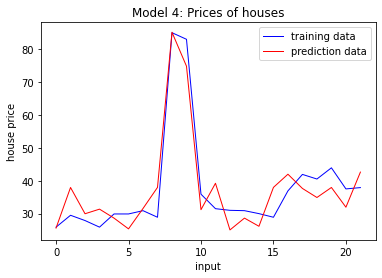

Average least squares error for the simple linear regression on training data 14.980336149786313 on the training data frame percentage 80.0


In [32]:
# define the training data and code 
index=4 # as predictor variable changed
no_train=int(np.round(len(df)*percentage)) # round the number and then take into integer by the int command. np.int is the bad command
print(no_train)
# train the input data
# DataFrame.iloc Purely integer-location based indexing for selection by position.
X_train=df.iloc[0:no_train,index].values # take only Bathrooms
x_train=np.c_[np.ones((no_train,1)),X_train]
#print(x_train.shape)
# train the output data
y_train=df.iloc[0:no_train,df.shape[1]-1].values
#print(y_train.shape)
#print(x_train)
#print(y_train)
# theta parameters or weights of the linear regression model are computed using the normal form 
theta_vec=np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
disp('Following are the theta parameters or weights of the linear regression model')
print(theta_vec)
y_predict=np.matmul(x_train,theta_vec)
#print(y_predict)
# plot the data 
df_serial=np.arange(0,len(X_train),1)
plt.plot(df_serial,y_train,'b-',linewidth=1,label='training data')
plt.plot(df_serial,y_predict,'r-',linewidth=1,label='prediction data')
plt.xlabel('input')
plt.ylabel('house price')
plt.title('Model 4: Prices of houses')
plt.legend()
plt.show()
# problem 2 (1)
mse=np.sum(np.square(y_predict-y_train))/(2*len(X_train))
print('Average least squares error for the simple linear regression on training data',mse, 'on the training data frame percentage', percentage*100)

# Model 4:
Price=(θ_0 ) ̂+ (θ_1 ) ̂Local Price +(θ_2 ) ̂  Bathrooms +(θ_3 ) ̂  Land Area + (θ_4 ) ̂Living area +(θ_5 ) ̂  # Garages +(θ_6 ) ̂  ( # Rooms) + (θ_7 ) ̂(# Bedrooms) + (θ_8 ) ̂Age of Home +(θ_9 ) ̂  Construction type +(θ_10 ) ̂  Architecture type+(θ_11 ) ̂ ( # Fire places)

where all $̂\hat{\theta_i}, i=0,11$ are zero except $i=0,4$ that come from the above table.   

(6, 2)


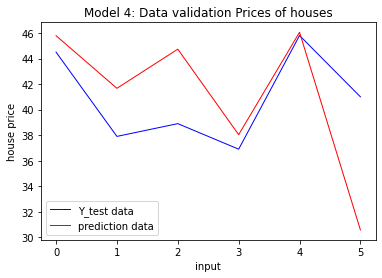

Average least squares error for the simple linear regression on test data 13.319820815966587 on the test data frame percentage 19.999999999999996


In [33]:
# Define the test Data Validation 
X_test=df.iloc[no_train:df.shape[0],index]
y_test=df.iloc[no_train:df.shape[0],df.shape[1]-1].values  # .values only consider the values not the position and values both
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

# construct system for the test data 
x_test=np.c_[np.ones((df.shape[0]-no_train,1)),X_test]
print(x_test.shape)
# Prediction is computed in the below 
y_predict=np.matmul(x_test,theta_vec)
#print(y_predict)

# plot the data 
df_serial=np.arange(0,len(X_test),1)
plt.plot(df_serial,y_test,'b-',linewidth=1,label='Y_test data')
plt.plot(df_serial,y_predict,'r-',linewidth=1,label='prediction data')
plt.xlabel('input')
plt.ylabel('house price')
plt.title('Model 4: Data validation Prices of houses')
plt.legend()
plt.show()
# problem 2 (1)
mse=np.sum(np.square(y_predict-y_test))/(2*len(X_test))
print('Average least squares error for the simple linear regression on test data',mse,'on the test data frame percentage', (1-percentage)*100)

# Model 5: Price ~ # Garages 

22
Following are the theta parameters or weights of the linear regression model
[23.47330097 11.36990291]


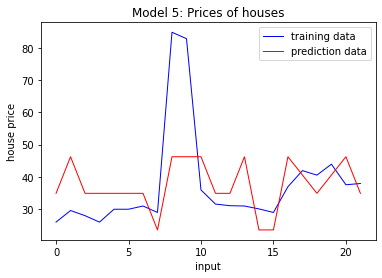

Average least squares error for the simple linear regression on training data 92.7286915269197 on the training data frame percentage 80.0


In [34]:
# define the training data and code 
index=5 # as predictor variable changed
no_train=int(np.round(len(df)*percentage)) # round the number and then take into integer by the int command. np.int is the bad command
print(no_train)
# train the input data
# DataFrame.iloc Purely integer-location based indexing for selection by position.
X_train=df.iloc[0:no_train,index].values # take only Bathrooms
x_train=np.c_[np.ones((no_train,1)),X_train]
#print(x_train.shape)
# train the output data
y_train=df.iloc[0:no_train,df.shape[1]-1].values
#print(y_train.shape)
#print(x_train)
#print(y_train)
# theta parameters or weights of the linear regression model are computed using the normal form 
theta_vec=np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
disp('Following are the theta parameters or weights of the linear regression model')
print(theta_vec)
y_predict=np.matmul(x_train,theta_vec)
#print(y_predict)
# plot the data 
df_serial=np.arange(0,len(X_train),1)
plt.plot(df_serial,y_train,'b-',linewidth=1,label='training data')
plt.plot(df_serial,y_predict,'r-',linewidth=1,label='prediction data')
plt.xlabel('input')
plt.ylabel('house price')
plt.title('Model 5: Prices of houses')
plt.legend()
plt.show()
# problem 2 (1)
mse=np.sum(np.square(y_predict-y_train))/(2*len(X_train))
print('Average least squares error for the simple linear regression on training data',mse, 'on the training data frame percentage', percentage*100)

# Model 5:
Price=(θ_0 ) ̂+ (θ_1 ) ̂Local Price +(θ_2 ) ̂  Bathrooms +(θ_3 ) ̂  Land Area + (θ_4 ) ̂Living area +(θ_5 ) ̂  # Garages +(θ_6 ) ̂  ( # Rooms) + (θ_7 ) ̂(# Bedrooms) + (θ_8 ) ̂Age of Home +(θ_9 ) ̂  Construction type +(θ_10 ) ̂  Architecture type+(θ_11 ) ̂ ( # Fire places)

where all $̂\hat{\theta_i}, i=0,11$ are zero except $i=0,5$ that come from the above table.   

(6, 2)


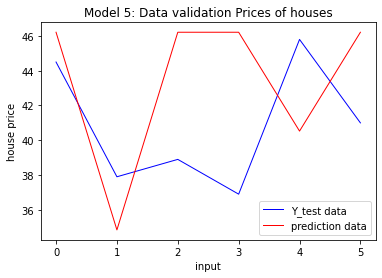

Average least squares error for the simple linear regression on test data 17.288587932415854 on the test data frame percentage 19.999999999999996


In [35]:
# Define the test Data Validation 
X_test=df.iloc[no_train:df.shape[0],index]
y_test=df.iloc[no_train:df.shape[0],df.shape[1]-1].values  # .values only consider the values not the position and values both
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

# construct system for the test data 
x_test=np.c_[np.ones((df.shape[0]-no_train,1)),X_test]
print(x_test.shape)
# Prediction is computed in the below 
y_predict=np.matmul(x_test,theta_vec)
#print(y_predict)

# plot the data 
df_serial=np.arange(0,len(X_test),1)
plt.plot(df_serial,y_test,'b-',linewidth=1,label='Y_test data')
plt.plot(df_serial,y_predict,'r-',linewidth=1,label='prediction data')
plt.xlabel('input')
plt.ylabel('house price')
plt.title('Model 5: Data validation Prices of houses')
plt.legend()
plt.show()
# problem 2 (1)
mse=np.sum(np.square(y_predict-y_test))/(2*len(X_test))
print('Average least squares error for the simple linear regression on test data',mse,'on the test data frame percentage', (1-percentage)*100)

# Model 7: Price ~ # Bedrooms 

22
Following are the theta parameters or weights of the linear regression model
[-11.47394636  15.15249042]


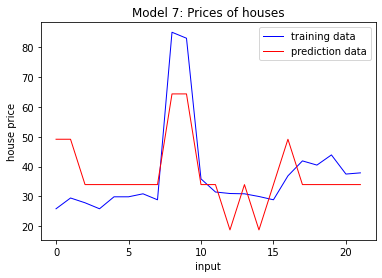

Average least squares error for the simple linear regression on training data 58.33356495994428 on the training data frame percentage 80.0


In [36]:
# define the training data and code 
index=7 # as predictor variable changed
no_train=int(np.round(len(df)*percentage)) # round the number and then take into integer by the int command. np.int is the bad command
print(no_train)
# train the input data
# DataFrame.iloc Purely integer-location based indexing for selection by position.
X_train=df.iloc[0:no_train,index].values # take only Bathrooms
x_train=np.c_[np.ones((no_train,1)),X_train]
#print(x_train.shape)
# train the output data
y_train=df.iloc[0:no_train,df.shape[1]-1].values
#print(y_train.shape)
#print(x_train)
#print(y_train)
# theta parameters or weights of the linear regression model are computed using the normal form 
theta_vec=np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
disp('Following are the theta parameters or weights of the linear regression model')
print(theta_vec)
y_predict=np.matmul(x_train,theta_vec)
#print(y_predict)
# plot the data 
df_serial=np.arange(0,len(X_train),1)
plt.plot(df_serial,y_train,'b-',linewidth=1,label='training data')
plt.plot(df_serial,y_predict,'r-',linewidth=1,label='prediction data')
plt.xlabel('input')
plt.ylabel('house price')
plt.title('Model 7: Prices of houses')
plt.legend()
plt.show()
# problem 2 (1)
mse=np.sum(np.square(y_predict-y_train))/(2*len(X_train))
print('Average least squares error for the simple linear regression on training data',mse, 'on the training data frame percentage', percentage*100)

# Model 7:
Price=(θ_0 ) ̂+ (θ_1 ) ̂Local Price +(θ_2 ) ̂  Bathrooms +(θ_3 ) ̂  Land Area + (θ_4 ) ̂Living area +(θ_5 ) ̂  # Garages +(θ_6 ) ̂  ( # Rooms) + (θ_7 ) ̂(# Bedrooms) + (θ_8 ) ̂Age of Home +(θ_9 ) ̂  Construction type +(θ_10 ) ̂  Architecture type+(θ_11 ) ̂ ( # Fire places)

where all $̂\hat{\theta_i}, i=0,11$ are zero except $i=0,7$ that come from the above table.   

(6, 2)


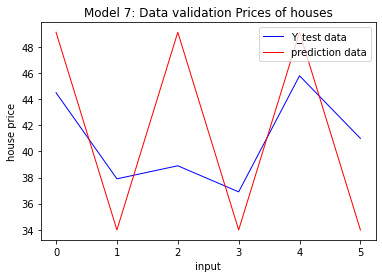

Average least squares error for the simple linear regression on test data 17.53943108586182 on the test data frame percentage 19.999999999999996


In [ ]:
# Define the test Data Validation 
X_test=df.iloc[no_train:df.shape[0],index]
y_test=df.iloc[no_train:df.shape[0],df.shape[1]-1].values  # .values only consider the values not the position and values both
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

# construct system for the test data 
x_test=np.c_[np.ones((df.shape[0]-no_train,1)),X_test]
print(x_test.shape)
# Prediction is computed in the below 
y_predict=np.matmul(x_test,theta_vec)
#print(y_predict)

# plot the data 
df_serial=np.arange(0,len(X_test),1)
plt.plot(df_serial,y_test,'b-',linewidth=1,label='Y_test data')
plt.plot(df_serial,y_predict,'r-',linewidth=1,label='prediction data')
plt.xlabel('input')
plt.ylabel('house price')
plt.title('Model 7: Data validation Prices of houses')
plt.legend()
plt.show()
# problem 2 (1)
mse=np.sum(np.square(y_predict-y_test))/(2*len(X_test))
print('Average least squares error for the simple linear regression on test data',mse,'on the test data frame percentage', (1-percentage)*100)

# Model 8: Price ~ Age of Home 

22
Following are the theta parameters or weights of the linear regression model
[54.37207148 -0.45966162]


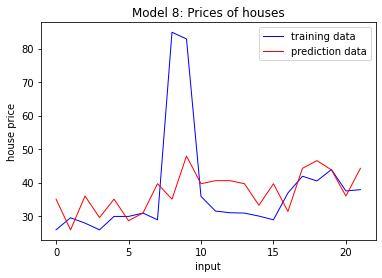

Average least squares error for the simple linear regression on training data 103.01675306323486 on the training data frame percentage 80.0


In [37]:
# define the training data and code 
index=8 # as predictor variable changed
no_train=int(np.round(len(df)*percentage)) # round the number and then take into integer by the int command. np.int is the bad command
print(no_train)
# train the input data
# DataFrame.iloc Purely integer-location based indexing for selection by position.
X_train=df.iloc[0:no_train,index].values # take only Bathrooms
x_train=np.c_[np.ones((no_train,1)),X_train]
#print(x_train.shape)
# train the output data
y_train=df.iloc[0:no_train,df.shape[1]-1].values
#print(y_train.shape)
#print(x_train)
#print(y_train)
# theta parameters or weights of the linear regression model are computed using the normal form 
theta_vec=np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
disp('Following are the theta parameters or weights of the linear regression model')
print(theta_vec)
y_predict=np.matmul(x_train,theta_vec)
#print(y_predict)
# plot the data 
df_serial=np.arange(0,len(X_train),1)
plt.plot(df_serial,y_train,'b-',linewidth=1,label='training data')
plt.plot(df_serial,y_predict,'r-',linewidth=1,label='prediction data')
plt.xlabel('input')
plt.ylabel('house price')
plt.title('Model 8: Prices of houses')
plt.legend()
plt.show()
# problem 2 (1)
mse=np.sum(np.square(y_predict-y_train))/(2*len(X_train))
print('Average least squares error for the simple linear regression on training data',mse, 'on the training data frame percentage', percentage*100)

# Model 8:
Price=(θ_0 ) ̂+ (θ_1 ) ̂Local Price +(θ_2 ) ̂  Bathrooms +(θ_3 ) ̂  Land Area + (θ_4 ) ̂Living area +(θ_5 ) ̂  # Garages +(θ_6 ) ̂  ( # Rooms) + (θ_7 ) ̂(# Bedrooms) + (θ_8 ) ̂Age of Home +(θ_9 ) ̂  Construction type +(θ_10 ) ̂  Architecture type+(θ_11 ) ̂ ( # Fire places)

where all $̂\hat{\theta_i}, i=0,11$ are zero except $i=0,8$ that come from the above table.   

(6, 2)


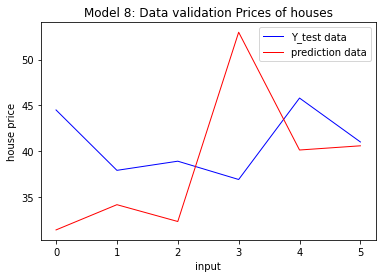

Average least squares error for the simple linear regression on test data 43.40245730638077 on the test data frame percentage 19.999999999999996


In [38]:
# Define the test Data Validation 
X_test=df.iloc[no_train:df.shape[0],index]
y_test=df.iloc[no_train:df.shape[0],df.shape[1]-1].values  # .values only consider the values not the position and values both
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

# construct system for the test data 
x_test=np.c_[np.ones((df.shape[0]-no_train,1)),X_test]
print(x_test.shape)
# Prediction is computed in the below 
y_predict=np.matmul(x_test,theta_vec)
#print(y_predict)

# plot the data 
df_serial=np.arange(0,len(X_test),1)
plt.plot(df_serial,y_test,'b-',linewidth=1,label='Y_test data')
plt.plot(df_serial,y_predict,'r-',linewidth=1,label='prediction data')
plt.xlabel('input')
plt.ylabel('house price')
plt.title('Model 8: Data validation Prices of houses')
plt.legend()
plt.show()
# problem 2 (1)
mse=np.sum(np.square(y_predict-y_test))/(2*len(X_test))
print('Average least squares error for the simple linear regression on test data',mse,'on the test data frame percentage', (1-percentage)*100)

# Model 9: Price ~  Construction type 

22
Following are the theta parameters or weights of the linear regression model
[31.94824962  2.45996956]


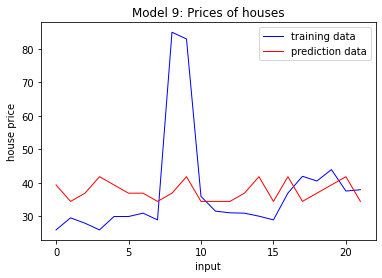

Average least squares error for the simple linear regression on training data 116.132393801024 on the training data frame percentage 80.0


In [39]:
# define the training data and code 
index=9 # as predictor variable changed
no_train=int(np.round(len(df)*percentage)) # round the number and then take into integer by the int command. np.int is the bad command
print(no_train)
# train the input data
# DataFrame.iloc Purely integer-location based indexing for selection by position.
X_train=df.iloc[0:no_train,index].values # take only Bathrooms
x_train=np.c_[np.ones((no_train,1)),X_train]
#print(x_train.shape)
# train the output data
y_train=df.iloc[0:no_train,df.shape[1]-1].values
#print(y_train.shape)
#print(x_train)
#print(y_train)
# theta parameters or weights of the linear regression model are computed using the normal form 
theta_vec=np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
disp('Following are the theta parameters or weights of the linear regression model')
print(theta_vec)
y_predict=np.matmul(x_train,theta_vec)
#print(y_predict)
# plot the data 
df_serial=np.arange(0,len(X_train),1)
plt.plot(df_serial,y_train,'b-',linewidth=1,label='training data')
plt.plot(df_serial,y_predict,'r-',linewidth=1,label='prediction data')
plt.xlabel('input')
plt.ylabel('house price')
plt.title('Model 9: Prices of houses')
plt.legend()
plt.show()
# problem 2 (1)
mse=np.sum(np.square(y_predict-y_train))/(2*len(X_train))
print('Average least squares error for the simple linear regression on training data',mse, 'on the training data frame percentage', percentage*100)

# Model 9:
Price=(θ_0 ) ̂+ (θ_1 ) ̂Local Price +(θ_2 ) ̂  Bathrooms +(θ_3 ) ̂  Land Area + (θ_4 ) ̂Living area +(θ_5 ) ̂  # Garages +(θ_6 ) ̂  ( # Rooms) + (θ_7 ) ̂(# Bedrooms) + (θ_8 ) ̂Age of Home +(θ_9 ) ̂  Construction type +(θ_10 ) ̂  Architecture type+(θ_11 ) ̂ ( # Fire places)

where all $̂\hat{\theta_i}, i=0,11$ are zero except $i=0,9$ that come from the above table.   

(6, 2)


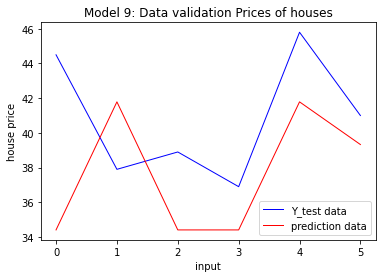

Average least squares error for the simple linear regression on test data 13.519734815401625 on the test data frame percentage 19.999999999999996


In [40]:
# Define the test Data Validation 
X_test=df.iloc[no_train:df.shape[0],index]
y_test=df.iloc[no_train:df.shape[0],df.shape[1]-1].values  # .values only consider the values not the position and values both
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

# construct system for the test data 
x_test=np.c_[np.ones((df.shape[0]-no_train,1)),X_test]
print(x_test.shape)
# Prediction is computed in the below 
y_predict=np.matmul(x_test,theta_vec)
#print(y_predict)

# plot the data 
df_serial=np.arange(0,len(X_test),1)
plt.plot(df_serial,y_test,'b-',linewidth=1,label='Y_test data')
plt.plot(df_serial,y_predict,'r-',linewidth=1,label='prediction data')
plt.xlabel('input')
plt.ylabel('house price')
plt.title('Model 9: Data validation Prices of houses')
plt.legend()
plt.show()
# problem 2 (1)
mse=np.sum(np.square(y_predict-y_test))/(2*len(X_test))
print('Average least squares error for the simple linear regression on test data',mse,'on the test data frame percentage', (1-percentage)*100)

# Model 10: Price ~  Architecture type

22
Following are the theta parameters or weights of the linear regression model
[37.29482759  0.11206897]


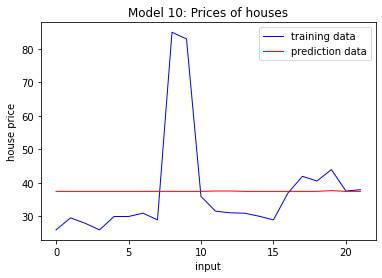

Average least squares error for the simple linear regression on training data 120.2381230407524 on the training data frame percentage 80.0


In [41]:
# define the training data and code 
index=10 # as predictor variable changed
no_train=int(np.round(len(df)*percentage)) # round the number and then take into integer by the int command. np.int is the bad command
print(no_train)
# train the input data
# DataFrame.iloc Purely integer-location based indexing for selection by position.
X_train=df.iloc[0:no_train,index].values # take only Bathrooms
x_train=np.c_[np.ones((no_train,1)),X_train]
#print(x_train.shape)
# train the output data
y_train=df.iloc[0:no_train,df.shape[1]-1].values
#print(y_train.shape)
#print(x_train)
#print(y_train)
# theta parameters or weights of the linear regression model are computed using the normal form 
theta_vec=np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
disp('Following are the theta parameters or weights of the linear regression model')
print(theta_vec)
y_predict=np.matmul(x_train,theta_vec)
#print(y_predict)
# plot the data 
df_serial=np.arange(0,len(X_train),1)
plt.plot(df_serial,y_train,'b-',linewidth=1,label='training data')
plt.plot(df_serial,y_predict,'r-',linewidth=1,label='prediction data')
plt.xlabel('input')
plt.ylabel('house price')
plt.title('Model 10: Prices of houses')
plt.legend()
plt.show()
# problem 2 (1)
mse=np.sum(np.square(y_predict-y_train))/(2*len(X_train))
print('Average least squares error for the simple linear regression on training data',mse, 'on the training data frame percentage', percentage*100)

# Model 10:
Price=(θ_0 ) ̂+ (θ_1 ) ̂Local Price +(θ_2 ) ̂  Bathrooms +(θ_3 ) ̂  Land Area + (θ_4 ) ̂Living area +(θ_5 ) ̂  # Garages +(θ_6 ) ̂  ( # Rooms) + (θ_7 ) ̂(# Bedrooms) + (θ_8 ) ̂Age of Home +(θ_9 ) ̂  Construction type +(θ_10 ) ̂  Architecture type+(θ_11 ) ̂ ( # Fire places)

where all $̂\hat{\theta_i}, i=0,11$ are zero except $i=0,10$ that come from the above table.   

(6, 2)


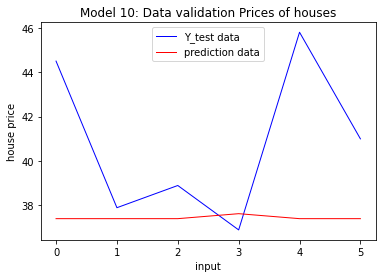

Average least squares error for the simple linear regression on test data 11.389467895362593 on the test data frame percentage 19.999999999999996


In [42]:
# Define the test Data Validation 
X_test=df.iloc[no_train:df.shape[0],index]
y_test=df.iloc[no_train:df.shape[0],df.shape[1]-1].values  # .values only consider the values not the position and values both
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

# construct system for the test data 
x_test=np.c_[np.ones((df.shape[0]-no_train,1)),X_test]
print(x_test.shape)
# Prediction is computed in the below 
y_predict=np.matmul(x_test,theta_vec)
#print(y_predict)

# plot the data 
df_serial=np.arange(0,len(X_test),1)
plt.plot(df_serial,y_test,'b-',linewidth=1,label='Y_test data')
plt.plot(df_serial,y_predict,'r-',linewidth=1,label='prediction data')
plt.xlabel('input')
plt.ylabel('house price')
plt.title('Model 10: Data validation Prices of houses')
plt.legend()
plt.show()
# problem 2 (1)
mse=np.sum(np.square(y_predict-y_test))/(2*len(X_test))
print('Average least squares error for the simple linear regression on test data',mse,'on the test data frame percentage', (1-percentage)*100)

# Model 11: Price ~  # Fire places

22
Following are the theta parameters or weights of the linear regression model
[32.20625 19.14375]


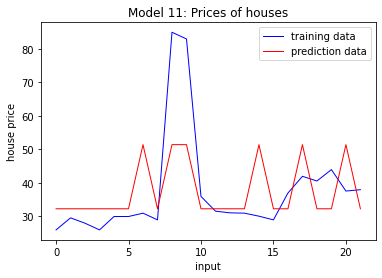

Average least squares error for the simple linear regression on training data 83.89419034090912 on the training data frame percentage 80.0


In [44]:
# define the training data and code 
index=11 # as predictor variable changed
no_train=int(np.round(len(df)*percentage)) # round the number and then take into integer by the int command. np.int is the bad command
print(no_train)
# train the input data
# DataFrame.iloc Purely integer-location based indexing for selection by position.
X_train=df.iloc[0:no_train,index].values # take only Bathrooms
x_train=np.c_[np.ones((no_train,1)),X_train]
#print(x_train.shape)
# train the output data
y_train=df.iloc[0:no_train,df.shape[1]-1].values
#print(y_train.shape)
#print(x_train)
#print(y_train)
# theta parameters or weights of the linear regression model are computed using the normal form 
theta_vec=np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
disp('Following are the theta parameters or weights of the linear regression model')
print(theta_vec)
y_predict=np.matmul(x_train,theta_vec)
#print(y_predict)
# plot the data 
df_serial=np.arange(0,len(X_train),1)
plt.plot(df_serial,y_train,'b-',linewidth=1,label='training data')
plt.plot(df_serial,y_predict,'r-',linewidth=1,label='prediction data')
plt.xlabel('input')
plt.ylabel('house price')
plt.title('Model 11: Prices of houses')
plt.legend()
plt.show()
# problem 2 (1)
mse=np.sum(np.square(y_predict-y_train))/(2*len(X_train))
print('Average least squares error for the simple linear regression on training data',mse, 'on the training data frame percentage', percentage*100)

# Model 11:
Price=(θ_0 ) ̂+ (θ_1 ) ̂Local Price +(θ_2 ) ̂  Bathrooms +(θ_3 ) ̂  Land Area + (θ_4 ) ̂Living area +(θ_5 ) ̂  # Garages +(θ_6 ) ̂  ( # Rooms) + (θ_7 ) ̂(# Bedrooms) + (θ_8 ) ̂Age of Home +(θ_9 ) ̂  Construction type +(θ_10 ) ̂  Architecture type+(θ_11 ) ̂ ( # Fire places)

where all $̂\hat{\theta_i}, i=0,11$ are zero except $i=0,11$ that come from the above table.   

(6, 2)


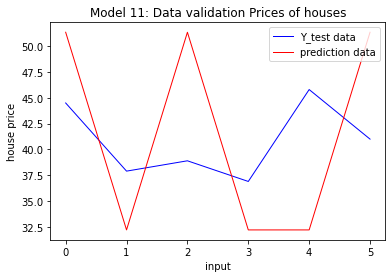

Average least squares error for the simple linear regression on test data 45.69063476562505 on the test data frame percentage 19.999999999999996


In [45]:
# Define the test Data Validation 
X_test=df.iloc[no_train:df.shape[0],index]
y_test=df.iloc[no_train:df.shape[0],df.shape[1]-1].values  # .values only consider the values not the position and values both
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

# construct system for the test data 
x_test=np.c_[np.ones((df.shape[0]-no_train,1)),X_test]
print(x_test.shape)
# Prediction is computed in the below 
y_predict=np.matmul(x_test,theta_vec)
#print(y_predict)

# plot the data 
df_serial=np.arange(0,len(X_test),1)
plt.plot(df_serial,y_test,'b-',linewidth=1,label='Y_test data')
plt.plot(df_serial,y_predict,'r-',linewidth=1,label='prediction data')
plt.xlabel('input')
plt.ylabel('house price')
plt.title('Model 11: Data validation Prices of houses')
plt.legend()
plt.show()
# problem 2 (1)
mse=np.sum(np.square(y_predict-y_test))/(2*len(X_test))
print('Average least squares error for the simple linear regression on test data',mse,'on the test data frame percentage', (1-percentage)*100)

# Without Local Price,	and Bathrooms

22
Following are the theta parameters or weights of the linear regression model for the data frame of percentage 80.0
[ 3.97419926  0.35856205 19.68735881  3.85856551  0.88955838 -2.03420624
 -0.18150314  1.31031421  0.5831026   4.48793874]


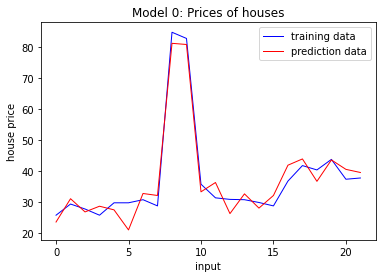

Average least squares error for the simple linear regression on training data 5.8601018406563075 on the training data frame percentage 80.0


In [152]:
from numpy.lib.function_base import disp
percentage= .80 # this will be working in rest of this problem 
# define the training data 
# first define how many examples we want 65 % data in the training set  
no_train=int(np.round(len(df)*percentage)) # round the number and then take into integer by the int command. np.int is the bad command
print(no_train)

# train the input data
# DataFrame.iloc Purely integer-location based indexing for selection by position.
X_train=df.iloc[0:no_train,3:df.shape[1]-1] # remove House ID from the df and target vealue "price" from the training data frame
df_theta0_vec=np.ones((len(X_train),1))
x_train=np.append(df_theta0_vec,X_train,axis=1)
#print(x_train.shape)
# train the output data
y_train=df.iloc[0:no_train,df.shape[1]-1].values
#print(y_train.shape)
#print(x_train)
#print(y_train)
# theta parameters or weights of the linear regression model are computed using the normal form 
theta_vec=np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
print('Following are the theta parameters or weights of the linear regression model for the data frame of percentage',percentage*100)
print(theta_vec)
model_parameters=theta_vec
y_predict=np.matmul(x_train,theta_vec)
#print(y_predict)

# plot the data 
df_serial=np.arange(0,len(X_train),1)

plt.plot(df_serial,y_train,'b-',linewidth=1,label='training data')
plt.plot(df_serial,y_predict,'r-',linewidth=1,label='prediction data')
plt.xlabel('input')
plt.ylabel('house price')
plt.title('Model 0: Prices of houses')
plt.legend()
plt.show()
# problem 2 (1)
mse=np.sum(np.square(y_predict-y_train))/(2*len(X_train))
print('Average least squares error for the simple linear regression on training data',mse, 'on the training data frame percentage', percentage*100)

(6, 10)


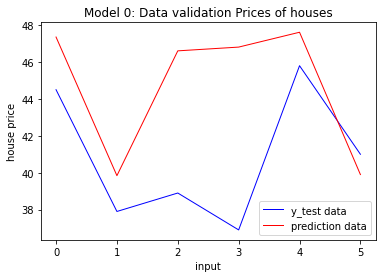

Average least squares error for the simple linear regression on test data 14.49806378634738 on the test data frame percentage 19.999999999999996


In [155]:
# Define the test Data
X_test=df.iloc[no_train:df.shape[0],3:df.shape[1]-1]
y_test=df.iloc[no_train:df.shape[0],df.shape[1]-1].values  # .values only consider the values not the position and values both
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

# construct system for the test data 
df_theta0_vec=np.ones((len(X_test),1))
x_test=np.append(df_theta0_vec,X_test,axis=1)
print(x_test.shape)
# Prediction is computed in the below 
y_predict=np.matmul(x_test,theta_vec)
#print(y_predict)
# plot the data 
df_serial=np.arange(0,len(X_test),1)
plt.plot(df_serial,y_test,'b-',linewidth=1,label='y_test data')
plt.plot(df_serial,y_predict,'r-',linewidth=1,label='prediction data')
plt.xlabel('input')
plt.ylabel('house price')
plt.title('Model 0: Data validation Prices of houses')
plt.legend()
plt.show()
mse=np.sum(np.square(y_predict-y_test))/(2*len(X_test))
print('Average least squares error for the simple linear regression on test data',mse, 'on the test data frame percentage', (1-percentage)*100)

In [153]:
X_train

,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,Architecture type,# Fire places
0,3.4720,0.998,1.0,7,4,42,3,1,0
1,3.5310,1.500,2.0,7,4,62,1,1,0
2,2.2750,1.175,1.0,6,3,40,2,1,0
3,4.0500,1.232,1.0,6,3,54,4,1,0
4,4.4550,1.121,1.0,6,3,42,3,1,0
5,4.4550,0.988,1.0,6,3,56,2,1,0
6,5.8500,1.240,1.0,7,3,51,2,1,1
7,9.5200,1.501,0.0,6,3,32,1,1,0
8,9.8000,3.420,2.0,10,5,42,2,1,1
9,12.8000,3.000,2.0,9,5,14,4,1,1


In [156]:
df.head()

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,Architecture type,# Fire places,Price (1000$)
0,1,4.9176,1.0,3.472,0.998,1.0,7,4,42,3,1,0,25.9
1,2,5.0208,1.0,3.531,1.500,2.0,7,4,62,1,1,0,29.5
2,3,4.5429,1.0,2.275,1.175,1.0,6,3,40,2,1,0,27.9
3,4,4.5573,1.0,4.050,1.232,1.0,6,3,54,4,1,0,25.9
4,5,5.0597,1.0,4.455,1.121,1.0,6,3,42,3,1,0,29.9


# Problem 2 (1) Conclusion: 

According to the 80% of training data we have the following conclusion. 

Training the Data: we consider 80 % data of the data frame
Model 0 - Average least squares error: 2.3530518421310846

Model 1 - Average least squares error: 6.850726514502525

Model 2 - Average least squares error: 13.490530303030305

Model 3 - Average least squares error: 60.724174324953175

Model 4 - Average least squares error: 14.980336149786313

Model 5 - Average least squares error: 92.7286915269197

Model 6 - Average least squares error: 39.203260381593736

Model 7 - Average least squares error: 58.33356495994428

Model 8 - Average least squares error: 103.01675306323486

Model 9 - Average least squares error: 116.132393801024

Model 10 - Average least squares error: 120.2381230407524

Model 11 - Average least squares error: 83.89419034090912



Therefore according to the Average least squares error, Architecture type is the least effect on the final value. 



Data validation: we consider 20 % data of the data frame

Model 0 Data validation error: 46.17503052581946

Model 1 Data validation error: 52.39813421249863

Model 2 Data validation error: 17.370956307870426

Model 3 Data validation error: 33.35415566906369

Model 4 Data validation error: 13.319820815966587

Model 5 Data validation error: 17.288587932415854

Model 6 Data validation error: 42.773009957831846

Model 7 Data validation error: 17.53943108586182

Model 8 Data validation error: 43.40245730638077

Model 9 Data validation error: 13.519734815401625

Model 10 Data validation error: 11.389467895362593

Model 11 Data validation error: 45.69063476562505

However, we can choose 20 % data randomly for the data validation. To make it simple, we choose the last 20% of data as data validation. We also can consider full data sets as well. We must change the percentage and change the test data accordingly. This we can do easily. 


# Problem 2 (2) Conclusion: 

I tried to build a linear regression model using different features independently. It looks like the bathroom or local price affects the final value most. Perhaps, there's some discrepancy in input feature vs. label in training and testing data. So, fitting a linear function to this data is tough. Surprisingly, using only the bathroom as the sole feature of this model is not a bad idea. So, Using only this feature (bathroom) is a good, optimal solution to predict the price.


# Problem 2 (3) Conclusion: 
On the contrary, the Age of home, Construction type, and Architecture type are the least impact on the price. Architecture type is the least effect on the final value.

# Final Remark on Problem 2: 
Analyzing all the plots described above, it looks like the model fits the data better. The model might overfit the data. We can choose the main important features or apply regularization to avoid overfitting. 

# Problem 3

Implement a locally weighted linear regression model for the data from Question 1. Refer to Slide 33 from Lecture 4 for reference. You should implement your own version of linear regression either using gradient descent or normal equations. **You SHOULD NOT use any pre-packaged library such as Sci-Kit Learn.**

Answer the following questions: 

1. Do you need any basis functions when using the locally weighted approach?

2. What is the difference between this implementation and the one for Question 1?

# Solution of Problem 3


In [144]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [145]:
# load the train data
X_train=np.load('/content/drive/MyDrive/Colab Notebooks/CS 5783 ML/Assignment1/x_train.npy')
y_train=np.load('/content/drive/MyDrive/Colab Notebooks/CS 5783 ML/Assignment1/y_train.npy')
# load the test data 
X_test=np.load('/content/drive/MyDrive/Colab Notebooks/CS 5783 ML/Assignment1/x_test.npy')
y_test=np.load('/content/drive/MyDrive/Colab Notebooks/CS 5783 ML/Assignment1/y_test.npy')

/usr/local/lib/python3.7/dist-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = N.array(data, dtype=dtype, copy=copy)


<function matplotlib.pyplot.show(*args, **kw)>

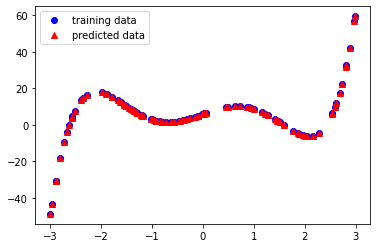

In [146]:
tau=0.02 # Initialize bandwidth started with tau=.05, but the least value is close to  tau=.02 and close to 1 does not give a good fit. 
# load the train data
X_train=np.load('/content/drive/MyDrive/Colab Notebooks/CS 5783 ML/Assignment1/x_train.npy')
y_train=np.load('/content/drive/MyDrive/Colab Notebooks/CS 5783 ML/Assignment1/y_train.npy')
# load the test data 
#X_test=np.load('/content/drive/MyDrive/Colab Notebooks/CS 5783 ML/Assignment1/x_test.npy')
X_test=X_train
y_test=np.load('/content/drive/MyDrive/Colab Notebooks/CS 5783 ML/Assignment1/y_test.npy')
m=X_train.shape[0] # no. of examples in the training data
w= np.mat(np.eye(m)) # define the weight matrix
Y_test=[]
for x in X_test:
  x_train=np.c_[np.ones((m,1)),X_train]
  m_qx= np.mat([1,x])
  for i in range(m):
    #xi=X_train[i]
    d=x-X_train[i]
    w[i,i]=np.exp(d * d.T / (-2.0 * tau**2))
  #calculate theta
  theta= np.linalg.inv(x_train.T.dot(w).dot(x_train)).dot(x_train.T).dot(w).dot(y_train)
  #theta= ((np.linalg.inv((x_train.T.dot(w)).dot(x_train)).dot(x_train.T)).dot(w)).dot(y_train)
  y_predict = np.dot(m_qx,theta.T)
  Y_test.append(y_predict[0,0])
  #Y_test.append(y_predict[0][0])
input_x=np.array(X_train)
output_y=np.array(y_train)
plt.plot(input_x,output_y,'bo',linewidth=1,label='training data')
Y_test=np.array(Y_test)
Y_test=np.reshape(Y_test,[Y_test.shape[0],-1])
plt.plot(X_train, Y_test,'r^',linewidth=3,label='predicted data')
plt.legend()
plt.show

# Good fit tau:

Initialize bandwidth tau=.02 is better because tau=0.01 started to give us the divergence. Also, when tau=1, the fitted line moves away from the actual data. Finally, the simulation shows a good fit when the tau lies in .09 to .02. Moreover, Initialize bandwidth started with tau=.05, but the least value is close to  tau=.02 and close to 1 does not give a good fit. 

# 3(1). 

When non-linear relationships exist between dependent and independent variables, the locally weighted linear regression model gives us a better prediction. In contrast, the Linear regression model needs a basis function to fit the nonlinear model like in Question 1. Moreover, the linear regression model finds the parameters $\theta$ once the model is fitted. Therefore we can store $\theta$  and use them later to make the predictions for other data. In contrast, locally weighted linear regression always uses the training set around the query points. Therefore, this model doesn't need any basis functions when using the locally weighted approach in a nonlinear model like this.   




# 3(2).

There is a  difference between the implementation of a locally weighted linear regression model and Simple linear regression model from Question 1 in the data.

The simple linear regression model uses the same parameters for all queries, and all errors affect the learned linear prediction. Locally weighted regression model, on the other hand, learns a linear prediction that is only good locally because far away errors do not weight as heavily as local ones.

The big difference is that the Locally weighted regression model doesn't need any basis functions to fit the nonlinear shape like Example 1 data, whereas the Linear regression model needs a basis function to fit the nonlinear model like in Question 1.